# Examples of Working with Ontologies in Python

## Use Cases / Task Descriptions

Here are some common ontology tasks that I regularly need to do in Python, or would like to do in Python. 

1. Finding content in an ontology: 
- Load an ontology from a local file
- Extract all the labels and synonyms of entities
- Find hierarchical relationships up, down (root, leaves)
- Find leaves with certain annotations
- Find targets of a given relationship type in combination with certain annotations

2. Modifying content in an ontology: 
- Add a new entity to an ontology
- Change the attributes of existing entities following some pattern (e.g. change metadata type, add annotations)
- Add axioms to existing entities
- Save amended ontology

3. Reason over an ontology using an OWL reasoner
- Check consistency
- Find inconsistent classes

## Ontology libraries 

Candidate general(ish)-purpose ontology libraries in Python include:
- [owlready2](https://bitbucket.org/jibalamy/owlready2/src): a module for *ontology-oriented programming* in Python 3, including an optimized RDF quadstore. [Paper](http://www.lesfleursdunormal.fr/static/_downloads/article_owlready_aim_2017.pdf)
- [ontobio](https://github.com/biolink/ontobio): python library for working with ontologies and ontology associations
- [pronto](https://github.com/althonos/pronto): A Python frontend to OBO ontologies.

New, experimental:
- [pyhornedowl](https://github.com/jannahastings/py-horned-owl/): An experimental port of [horned-owl](https://github.com/phillord/horned-owl) into Python. 

Additional libraries not yet included: 
- [pyobo](https://github.com/pyobo/pyobo): Another Python frontend to OBO ontologies. Good with identifiers and xrefs. 


# OWLReady2

## Load ontology from file

In [3]:
from owlready2 import *

#onto = get_ontology("addicto.owl").load()
onto = get_ontology("addicto-merged.owl").load()

# List all classes found in the ontology
import itertools
for c in itertools.islice(onto.classes(),10): 
    print(c,c.label,c.iri)


addictovocab.org.ADDICTO_0000101 ['7-day point prevalence tobacco smoking abstinence'] http://addictovocab.org/ADDICTO_0000101
addictovocab.org.ADDICTO_0000697 ['point prevalence tobacco smoking abstinence'] http://addictovocab.org/ADDICTO_0000697
addictovocab.org.ADDICTO_0000104 ['abstinence'] http://addictovocab.org/ADDICTO_0000104
ontology.BCIO_042000 ['Human behaviour'] http://humanbehaviourchange.org/ontology/BCIO_042000
addictovocab.org.ADDICTO_0000105 ['abstinence rate'] http://addictovocab.org/ADDICTO_0000105
addictovocab.org.ADDICTO_0000525 ['population attribute'] http://addictovocab.org/ADDICTO_0000525
addictovocab.org.ADDICTO_0000109 ['addictiveness of a behaviour'] http://addictovocab.org/ADDICTO_0000109
addictovocab.org.ADDICTO_0000719 ['behaviour attribute'] http://addictovocab.org/ADDICTO_0000719
addictovocab.org.ADDICTO_0000110 ['adolescent alcohol consumption'] http://addictovocab.org/ADDICTO_0000110
addictovocab.org.ADDICTO_0000523 ['adolescent'] http://addictovocab.

## Search for entries in the ontology

### Label searches


In [6]:
# Find entries in the ontology by a partial match on label or synonym

search_term = 'smoker'

# Nothing matches just the label
results = onto.search(label = search_term)
print("1:",results)

# But we can use wildcards, that's cool
results = onto.search(label = '*'+search_term)
print("2:",[r.label for r in results])


1: []
2: [['daily cigarette smoker', 'daily cigarette smoker'], ['daily tobacco smoker', 'daily tobacco smoker'], ['tobacco smoker', 'tobacco smoker'], ['non-daily tobacco smoker', 'non-daily tobacco smoker'], ['predominant smoker', 'predominant smoker'], ['ex-smoker', 'ex-smoker'], ['chain smoker', 'chain smoker'], ['ever tobacco smoker', 'ever tobacco smoker'], ['ex e-cigarette user current smoker', 'ex e-cigarette user current smoker'], ['former regular smoker', 'former regular smoker'], ['former tobacco smoker', 'former tobacco smoker'], ['never smoker', 'never smoker'], ['not a current smoker', 'not a current smoker'], ['pregnant smoker', 'pregnant smoker'], ['recent former regular smoker', 'recent former regular smoker'], ['recent smoker', 'recent smoker'], ['cannabis smoker', 'cannabis smoker'], ['daily cannabis smoker', 'daily cannabis smoker'], ['daily non-treatment-seeking cigarette smoker', 'daily non-treatment-seeking cigarette smoker'], ['exclusive cannabis smoker', 'exclu

### Annotation metadata searches

The documentation for OWLReady says that "The following annotations are available by default: comment, isDefinedBy, label, seeAlso, backwardCompatibleWith, deprecated, incompatibleWith, priorVersion, versionInfo."

It is not exactly clear how to retrieve synonyms or definitions (those are the annotations I use the most often). 

In [8]:
# We can see if there are any comments for our label search results
print("1: ", [r.comment for r in results])

# There are no built in definition or synonym annotations -- i.e. you can't just ask for these:  
#print("2:",[r.definition for r in results])
#print("3:",[r.synonyms for r in results])

# What attributes are there? 
# Not documented as far as I could tell, but I found them by reading the source code of the owlready implementation: 
print("2: ",results[0].namespace.world._props)

print("3: ", results[0].__dict__)

1:  [[], [], ['This refers to a current time frame for participation. This should be specified unless it is obvious from context.', 'This refers to a current time frame for participation. This should be specified unless it is obvious from context.'], [], [], [], [], ['Ever should be further defined and frequency of past use should be indicated where possible.', 'Ever should be further defined and frequency of past use should be indicated where possible.'], ['The time period and frequency of past e-cigarette use should also be defined,', 'The time period and frequency of past e-cigarette use should also be defined,'], [], [], ['Never smoker is often defined as a person who has smoked fewer than 20 cigarettes  in their lifetime.', 'Never smoker is often defined as a person who has smoked fewer than 20 cigarettes  in their lifetime.'], ['The term nono-smoker is included as a synonym but is discouraged from use. Not currently smoking also needs to be further defined by providign details of

<span style="color: red;">Conclusion: It does not seem to be possible to get the synonyms or definitions from the ontology. Or did I miss something? </span>

### Hierarchical searches: find all ancestors and descendents


In [10]:
[smoker] = onto.search(label = 'tobacco smoker')

print(smoker, smoker.label)

addictovocab.org.ADDICTO_0000405 ['tobacco smoker', 'tobacco smoker']


Why is the label duplicated?


Getting the ancestors and descendents is not prominent in the documentation (??) but I can see in the code. 


In [11]:
print("Ancestors:",smoker.ancestors())
print("Descendants:",smoker.descendants())

Ancestors: {obo.BFO_0000004, obo.OGMS_0000087, addictovocab.org.ADDICTO_0000849, addictovocab.org.ADDICTO_0000405, obo.BFO_0000001, obo.BFO_0000002, obo.MF_0000016, owl.Thing, obo.BFO_0000040}
Descendants: {addictovocab.org.ADDICTO_0000773, addictovocab.org.ADDICTO_0000808, addictovocab.org.ADDICTO_0000772, addictovocab.org.ADDICTO_0000788, addictovocab.org.ADDICTO_0000368, addictovocab.org.ADDICTO_0000370, addictovocab.org.ADDICTO_0000386, addictovocab.org.ADDICTO_0000770, addictovocab.org.ADDICTO_0000405, addictovocab.org.ADDICTO_0000786, addictovocab.org.ADDICTO_0000802}


## Modifying the ontology

Scenario: I wish to update the label of a class with a user-specified ID to a value that a user has supplied. The ID and the new label are in strings. 


In [13]:
new_id = 'ADDICTO_0000405'
new_label = 'Testing'

# Get the class firstly

#[r] = onto.query(iri=new_id) # Nope - returns None
#print(r)
#[r] = onto.search(iri=new_id) # Nope - returns Too few values to unpack, expected 1 got 0
#print(r)

[r] = onto.search(iri='*'+new_id) 
print(r, r.label)

r.label = new_label

print(r, r.label)

# Ok. That seems to work. 

# To create a class

with onto:
    class RegularSmoker(Thing):
        pass

# To create a class *dynamically* need reflection: 

import types

with onto:
    #NewClass = types.new_class("NewClassName", (SuperClass,))
    NewClass = types.new_class("RegularSmoker", (r,))

print(NewClass)


addictovocab.org.ADDICTO_0000405 ['Testing']
addictovocab.org.ADDICTO_0000405 ['Testing']
addicto-merged.RegularSmoker


To add dynamically a new node or a new *type* of attribute seems to require reflection? 


## Reasoning with the ontology

Owlready2 links to HermiT. Let's see if that can be made to work here. 


In [14]:
with onto:
    sync_reasoner()

* Owlready2 * Running HermiT...
    java -Xmx2000M -cp /Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/owlready2/hermit:/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/owlready2/hermit/HermiT.jar org.semanticweb.HermiT.cli.CommandLine -c -O -D -I file:////var/folders/wr/4fyz19y54_3_8gp5lh28w05xl0jvvw/T/tmprqxqhwpo


OwlReadyJavaError: Java error message is:
Exception in thread "main" org.semanticweb.owlapi.model.OWLRuntimeException: org.coode.owlapi.rdfxml.parser.TranslatedUnloadedImportException: Could not load imported ontology: <http://addictovocab.org/addicto_external.owl> Cause: Problem parsing http://addictovocab.org/addicto_external.owl
Could not parse ontology.  Either a suitable parser could not be found, or parsing failed.  See parser logs below for explanation.
The following parsers were tried:
1) RDFXMLParser
2) OWLXMLParser
3) OWLFunctionalSyntaxOWLParser
4) TurtleOntologyParser
5) OWLOBOParser
6) KRSS2OWLParser
7) ManchesterOWLSyntaxOntologyParser


Detailed logs:
--------------------------------------------------------------------------------
Parser: RDFXMLParser
org.xml.sax.SAXParseException; systemId: http://addictovocab.org/addicto_external.owl; lineNumber: 1; columnNumber: 1; Content is not allowed in prolog.

--------------------------------------------------------------------------------
Parser: OWLXMLParser
org.xml.sax.SAXParseException; systemId: http://addictovocab.org/addicto_external.owl; lineNumber: 1; columnNumber: 1; Content is not allowed in prolog.

--------------------------------------------------------------------------------
Parser: OWLFunctionalSyntaxOWLParser
Encountered " <PN_LOCAL> "Redirecting "" at line 1, column 1.
Was expecting:
    "Ontology" ...
     (Line 0)

--------------------------------------------------------------------------------
Parser: TurtleOntologyParser
uk.ac.manchester.cs.owl.owlapi.turtle.parser.ParseException: Encountered "" at line 1, column 1.
Was expecting one of:
    

--------------------------------------------------------------------------------
Parser: OWLOBOParser
org.coode.owlapi.obo.parser.ParseException: Encountered "<EOF>" at line 1, column 67.
Was expecting one of:
    "[" ...
    <TAG_NAME> ...
    <QUOTED_STRING> ...
    <STRING> ...
    <TAG_VALUE_WS> ...
    <COMMENT> ...
     (Line 1)

--------------------------------------------------------------------------------
Parser: KRSS2OWLParser
de.uulm.ecs.ai.owlapi.krssparser.ParseException: Encountered " <NAME> "Redirecting "" at line 1, column 1.
Was expecting:
    <EOF> 
    

--------------------------------------------------------------------------------
Parser: ManchesterOWLSyntaxOntologyParser
Encountered 'Redirecting to https://addictovocab.org/addicto_external.owl (308)' at line 1 column 1.  Expected either 'Ontology:' or 'Prefix:' (Line 1)


org.semanticweb.owlapi.model.UnloadableImportException: Could not load imported ontology: <http://addictovocab.org/addicto_external.owl> Cause: Problem parsing http://addictovocab.org/addicto_external.owl
Could not parse ontology.  Either a suitable parser could not be found, or parsing failed.  See parser logs below for explanation.
The following parsers were tried:
1) RDFXMLParser
2) OWLXMLParser
3) OWLFunctionalSyntaxOWLParser
4) TurtleOntologyParser
5) OWLOBOParser
6) KRSS2OWLParser
7) ManchesterOWLSyntaxOntologyParser


Detailed logs:
--------------------------------------------------------------------------------
Parser: RDFXMLParser
org.xml.sax.SAXParseException; systemId: http://addictovocab.org/addicto_external.owl; lineNumber: 1; columnNumber: 1; Content is not allowed in prolog.

--------------------------------------------------------------------------------
Parser: OWLXMLParser
org.xml.sax.SAXParseException; systemId: http://addictovocab.org/addicto_external.owl; lineNumber: 1; columnNumber: 1; Content is not allowed in prolog.

--------------------------------------------------------------------------------
Parser: OWLFunctionalSyntaxOWLParser
Encountered " <PN_LOCAL> "Redirecting "" at line 1, column 1.
Was expecting:
    "Ontology" ...
     (Line 0)

--------------------------------------------------------------------------------
Parser: TurtleOntologyParser
uk.ac.manchester.cs.owl.owlapi.turtle.parser.ParseException: Encountered "" at line 1, column 1.
Was expecting one of:
    

--------------------------------------------------------------------------------
Parser: OWLOBOParser
org.coode.owlapi.obo.parser.ParseException: Encountered "<EOF>" at line 1, column 67.
Was expecting one of:
    "[" ...
    <TAG_NAME> ...
    <QUOTED_STRING> ...
    <STRING> ...
    <TAG_VALUE_WS> ...
    <COMMENT> ...
     (Line 1)

--------------------------------------------------------------------------------
Parser: KRSS2OWLParser
de.uulm.ecs.ai.owlapi.krssparser.ParseException: Encountered " <NAME> "Redirecting "" at line 1, column 1.
Was expecting:
    <EOF> 
    

--------------------------------------------------------------------------------
Parser: ManchesterOWLSyntaxOntologyParser
Encountered 'Redirecting to https://addictovocab.org/addicto_external.owl (308)' at line 1 column 1.  Expected either 'Ontology:' or 'Prefix:' (Line 1)


	at uk.ac.manchester.cs.owl.owlapi.turtle.parser.OWLRDFConsumerAdapter.handleTriple(OWLRDFConsumerAdapter.java:92)
	at uk.ac.manchester.cs.owl.owlapi.turtle.parser.TurtleParser.parseObject(TurtleParser.java:335)
	at uk.ac.manchester.cs.owl.owlapi.turtle.parser.TurtleParser.parseObjectList(TurtleParser.java:310)
	at uk.ac.manchester.cs.owl.owlapi.turtle.parser.TurtleParser.parsePredicateObjectList(TurtleParser.java:257)
	at uk.ac.manchester.cs.owl.owlapi.turtle.parser.TurtleParser.parseTriples(TurtleParser.java:185)
	at uk.ac.manchester.cs.owl.owlapi.turtle.parser.TurtleParser.parseStatement(TurtleParser.java:178)
	at uk.ac.manchester.cs.owl.owlapi.turtle.parser.TurtleParser.parseDocument(TurtleParser.java:130)
	at uk.ac.manchester.cs.owl.owlapi.turtle.parser.TurtleOntologyParser.parse(TurtleOntologyParser.java:100)
	at uk.ac.manchester.cs.owl.owlapi.ParsableOWLOntologyFactory.loadOWLOntology(ParsableOWLOntologyFactory.java:206)
	at uk.ac.manchester.cs.owl.owlapi.OWLOntologyManagerImpl.loadOntology(OWLOntologyManagerImpl.java:880)
	at uk.ac.manchester.cs.owl.owlapi.OWLOntologyManagerImpl.loadOntology(OWLOntologyManagerImpl.java:800)
	at uk.ac.manchester.cs.owl.owlapi.OWLOntologyManagerImpl.loadOntology(OWLOntologyManagerImpl.java:758)
	at org.semanticweb.HermiT.cli.CommandLine.main(CommandLine.java:798)
Caused by: org.coode.owlapi.rdfxml.parser.TranslatedUnloadedImportException: Could not load imported ontology: <http://addictovocab.org/addicto_external.owl> Cause: Problem parsing http://addictovocab.org/addicto_external.owl
Could not parse ontology.  Either a suitable parser could not be found, or parsing failed.  See parser logs below for explanation.
The following parsers were tried:
1) RDFXMLParser
2) OWLXMLParser
3) OWLFunctionalSyntaxOWLParser
4) TurtleOntologyParser
5) OWLOBOParser
6) KRSS2OWLParser
7) ManchesterOWLSyntaxOntologyParser


Detailed logs:
--------------------------------------------------------------------------------
Parser: RDFXMLParser
org.xml.sax.SAXParseException; systemId: http://addictovocab.org/addicto_external.owl; lineNumber: 1; columnNumber: 1; Content is not allowed in prolog.

--------------------------------------------------------------------------------
Parser: OWLXMLParser
org.xml.sax.SAXParseException; systemId: http://addictovocab.org/addicto_external.owl; lineNumber: 1; columnNumber: 1; Content is not allowed in prolog.

--------------------------------------------------------------------------------
Parser: OWLFunctionalSyntaxOWLParser
Encountered " <PN_LOCAL> "Redirecting "" at line 1, column 1.
Was expecting:
    "Ontology" ...
     (Line 0)

--------------------------------------------------------------------------------
Parser: TurtleOntologyParser
uk.ac.manchester.cs.owl.owlapi.turtle.parser.ParseException: Encountered "" at line 1, column 1.
Was expecting one of:
    

--------------------------------------------------------------------------------
Parser: OWLOBOParser
org.coode.owlapi.obo.parser.ParseException: Encountered "<EOF>" at line 1, column 67.
Was expecting one of:
    "[" ...
    <TAG_NAME> ...
    <QUOTED_STRING> ...
    <STRING> ...
    <TAG_VALUE_WS> ...
    <COMMENT> ...
     (Line 1)

--------------------------------------------------------------------------------
Parser: KRSS2OWLParser
de.uulm.ecs.ai.owlapi.krssparser.ParseException: Encountered " <NAME> "Redirecting "" at line 1, column 1.
Was expecting:
    <EOF> 
    

--------------------------------------------------------------------------------
Parser: ManchesterOWLSyntaxOntologyParser
Encountered 'Redirecting to https://addictovocab.org/addicto_external.owl (308)' at line 1 column 1.  Expected either 'Ontology:' or 'Prefix:' (Line 1)


org.semanticweb.owlapi.model.UnloadableImportException: Could not load imported ontology: <http://addictovocab.org/addicto_external.owl> Cause: Problem parsing http://addictovocab.org/addicto_external.owl
Could not parse ontology.  Either a suitable parser could not be found, or parsing failed.  See parser logs below for explanation.
The following parsers were tried:
1) RDFXMLParser
2) OWLXMLParser
3) OWLFunctionalSyntaxOWLParser
4) TurtleOntologyParser
5) OWLOBOParser
6) KRSS2OWLParser
7) ManchesterOWLSyntaxOntologyParser


Detailed logs:
--------------------------------------------------------------------------------
Parser: RDFXMLParser
org.xml.sax.SAXParseException; systemId: http://addictovocab.org/addicto_external.owl; lineNumber: 1; columnNumber: 1; Content is not allowed in prolog.

--------------------------------------------------------------------------------
Parser: OWLXMLParser
org.xml.sax.SAXParseException; systemId: http://addictovocab.org/addicto_external.owl; lineNumber: 1; columnNumber: 1; Content is not allowed in prolog.

--------------------------------------------------------------------------------
Parser: OWLFunctionalSyntaxOWLParser
Encountered " <PN_LOCAL> "Redirecting "" at line 1, column 1.
Was expecting:
    "Ontology" ...
     (Line 0)

--------------------------------------------------------------------------------
Parser: TurtleOntologyParser
uk.ac.manchester.cs.owl.owlapi.turtle.parser.ParseException: Encountered "" at line 1, column 1.
Was expecting one of:
    

--------------------------------------------------------------------------------
Parser: OWLOBOParser
org.coode.owlapi.obo.parser.ParseException: Encountered "<EOF>" at line 1, column 67.
Was expecting one of:
    "[" ...
    <TAG_NAME> ...
    <QUOTED_STRING> ...
    <STRING> ...
    <TAG_VALUE_WS> ...
    <COMMENT> ...
     (Line 1)

--------------------------------------------------------------------------------
Parser: KRSS2OWLParser
de.uulm.ecs.ai.owlapi.krssparser.ParseException: Encountered " <NAME> "Redirecting "" at line 1, column 1.
Was expecting:
    <EOF> 
    

--------------------------------------------------------------------------------
Parser: ManchesterOWLSyntaxOntologyParser
Encountered 'Redirecting to https://addictovocab.org/addicto_external.owl (308)' at line 1 column 1.  Expected either 'Ontology:' or 'Prefix:' (Line 1)


	at org.coode.owlapi.rdfxml.parser.OWLRDFConsumer.statementWithResourceValue(OWLRDFConsumer.java:1704)
	at uk.ac.manchester.cs.owl.owlapi.turtle.parser.OWLRDFConsumerAdapter.handleTriple(OWLRDFConsumerAdapter.java:89)
	... 12 more
Caused by: org.semanticweb.owlapi.model.UnloadableImportException: Could not load imported ontology: <http://addictovocab.org/addicto_external.owl> Cause: Problem parsing http://addictovocab.org/addicto_external.owl
Could not parse ontology.  Either a suitable parser could not be found, or parsing failed.  See parser logs below for explanation.
The following parsers were tried:
1) RDFXMLParser
2) OWLXMLParser
3) OWLFunctionalSyntaxOWLParser
4) TurtleOntologyParser
5) OWLOBOParser
6) KRSS2OWLParser
7) ManchesterOWLSyntaxOntologyParser


Detailed logs:
--------------------------------------------------------------------------------
Parser: RDFXMLParser
org.xml.sax.SAXParseException; systemId: http://addictovocab.org/addicto_external.owl; lineNumber: 1; columnNumber: 1; Content is not allowed in prolog.

--------------------------------------------------------------------------------
Parser: OWLXMLParser
org.xml.sax.SAXParseException; systemId: http://addictovocab.org/addicto_external.owl; lineNumber: 1; columnNumber: 1; Content is not allowed in prolog.

--------------------------------------------------------------------------------
Parser: OWLFunctionalSyntaxOWLParser
Encountered " <PN_LOCAL> "Redirecting "" at line 1, column 1.
Was expecting:
    "Ontology" ...
     (Line 0)

--------------------------------------------------------------------------------
Parser: TurtleOntologyParser
uk.ac.manchester.cs.owl.owlapi.turtle.parser.ParseException: Encountered "" at line 1, column 1.
Was expecting one of:
    

--------------------------------------------------------------------------------
Parser: OWLOBOParser
org.coode.owlapi.obo.parser.ParseException: Encountered "<EOF>" at line 1, column 67.
Was expecting one of:
    "[" ...
    <TAG_NAME> ...
    <QUOTED_STRING> ...
    <STRING> ...
    <TAG_VALUE_WS> ...
    <COMMENT> ...
     (Line 1)

--------------------------------------------------------------------------------
Parser: KRSS2OWLParser
de.uulm.ecs.ai.owlapi.krssparser.ParseException: Encountered " <NAME> "Redirecting "" at line 1, column 1.
Was expecting:
    <EOF> 
    

--------------------------------------------------------------------------------
Parser: ManchesterOWLSyntaxOntologyParser
Encountered 'Redirecting to https://addictovocab.org/addicto_external.owl (308)' at line 1 column 1.  Expected either 'Ontology:' or 'Prefix:' (Line 1)


	at uk.ac.manchester.cs.owl.owlapi.OWLOntologyManagerImpl.makeLoadImportRequest(OWLOntologyManagerImpl.java:1315)
	at org.coode.owlapi.rdfxml.parser.TPImportsHandler.handleTriple(TPImportsHandler.java:89)
	at org.coode.owlapi.rdfxml.parser.OWLRDFConsumer.handleStreaming(OWLRDFConsumer.java:1742)
	at org.coode.owlapi.rdfxml.parser.OWLRDFConsumer.statementWithResourceValue(OWLRDFConsumer.java:1701)
	... 13 more
Caused by: org.semanticweb.owlapi.io.UnparsableOntologyException: Problem parsing http://addictovocab.org/addicto_external.owl
Could not parse ontology.  Either a suitable parser could not be found, or parsing failed.  See parser logs below for explanation.
The following parsers were tried:
1) RDFXMLParser
2) OWLXMLParser
3) OWLFunctionalSyntaxOWLParser
4) TurtleOntologyParser
5) OWLOBOParser
6) KRSS2OWLParser
7) ManchesterOWLSyntaxOntologyParser


Detailed logs:
--------------------------------------------------------------------------------
Parser: RDFXMLParser
org.xml.sax.SAXParseException; systemId: http://addictovocab.org/addicto_external.owl; lineNumber: 1; columnNumber: 1; Content is not allowed in prolog.

--------------------------------------------------------------------------------
Parser: OWLXMLParser
org.xml.sax.SAXParseException; systemId: http://addictovocab.org/addicto_external.owl; lineNumber: 1; columnNumber: 1; Content is not allowed in prolog.

--------------------------------------------------------------------------------
Parser: OWLFunctionalSyntaxOWLParser
Encountered " <PN_LOCAL> "Redirecting "" at line 1, column 1.
Was expecting:
    "Ontology" ...
     (Line 0)

--------------------------------------------------------------------------------
Parser: TurtleOntologyParser
uk.ac.manchester.cs.owl.owlapi.turtle.parser.ParseException: Encountered "" at line 1, column 1.
Was expecting one of:
    

--------------------------------------------------------------------------------
Parser: OWLOBOParser
org.coode.owlapi.obo.parser.ParseException: Encountered "<EOF>" at line 1, column 67.
Was expecting one of:
    "[" ...
    <TAG_NAME> ...
    <QUOTED_STRING> ...
    <STRING> ...
    <TAG_VALUE_WS> ...
    <COMMENT> ...
     (Line 1)

--------------------------------------------------------------------------------
Parser: KRSS2OWLParser
de.uulm.ecs.ai.owlapi.krssparser.ParseException: Encountered " <NAME> "Redirecting "" at line 1, column 1.
Was expecting:
    <EOF> 
    

--------------------------------------------------------------------------------
Parser: ManchesterOWLSyntaxOntologyParser
Encountered 'Redirecting to https://addictovocab.org/addicto_external.owl (308)' at line 1 column 1.  Expected either 'Ontology:' or 'Prefix:' (Line 1)


	at uk.ac.manchester.cs.owl.owlapi.ParsableOWLOntologyFactory.loadOWLOntology(ParsableOWLOntologyFactory.java:236)
	at uk.ac.manchester.cs.owl.owlapi.OWLOntologyManagerImpl.loadOntology(OWLOntologyManagerImpl.java:880)
	at uk.ac.manchester.cs.owl.owlapi.OWLOntologyManagerImpl.loadOntology(OWLOntologyManagerImpl.java:800)
	at uk.ac.manchester.cs.owl.owlapi.OWLOntologyManagerImpl.loadImports(OWLOntologyManagerImpl.java:1278)
	at uk.ac.manchester.cs.owl.owlapi.OWLOntologyManagerImpl.makeLoadImportRequest(OWLOntologyManagerImpl.java:1309)
	... 16 more


<span style="color: red;">This parsing problem is because the file loader is not following HTTP redirects. </span>

I may try to fix that later...

Observations from the documentation: the reasoner asserts the results of reasoning into the ontology specified in the "with ...". Otherwise, it adds them to an ontology with the namespace ‘http://inferrences/’


# OntoBio

Notice that OntoBio and Pronto have an incompatibility in terms of the networkx version they depend on. Pronto requires the newer networkx and OntoBio the older networkx. 

When installing pronto: 

`
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
ontobio 2.1.1 requires networkx==2.2, but you have networkx 2.5 which is incompatible.
`


When installing ontobio: 

`
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
pronto 2.3.1 requires networkx~=2.3, but you have networkx 2.2 which is incompatible.`


For now proceeding without this working - close network server, change networkx version, start server again. 

## Load an ontology

It doesn't seem to work (at least for me) to load from OWL files. From OBO it seems to work. 



In [15]:

from ontobio.ontol_factory import OntologyFactory

ofactory = OntologyFactory()
#ont = ofactory.create("addicto.owl")
# Nope: Gives error: CalledProcessError: Command '['owltools', 'addicto.owl', '-o', '-f', 'json', '/tmp/ca1ba9938d82084c9263f4e273df272dcd886ec50e97c260b09f570cd82e61e5']' returned non-zero exit status 1.

ont = ofactory.create("addicto.obo")

print(ont)

http://addictovocab.org/addicto.owl handle: addicto.obo meta: {'subsets': [], 'xrefs': [], 'basicPropertyValues': [{'pred': 'http://www.geneontology.org/formats/oboInOwl#hasOBOFormatVersion', 'val': '1.2'}]}


## Search for entries in the ontology

### Label searches

Documentation says regular expressions can be used in the search but doesn't give examples of the syntax of the regular expressions that should be used?  
- Found an example in another notebook ... the wildcard character is '%'
- Also the code itself  has documentation for this method. 

In [16]:
print("Search for 'smoker':", ont.search('smoker'))

print("Search for '%smoker':", [f"{x}--{ont.label(x)}" for x in ont.search('%smoker')])

Search for 'smoker': []
Search for '%smoker': ['OBO:ADDICTO_0000394--predominant smoker', 'OBO:ADDICTO_0000392--positive self-appraisal of tobacco smoker identity', 'OBO:ADDICTO_0000714--ex-smoker identity', 'OBO:ADDICTO_0000805--exclusive cannabis smoker', 'OBO:ADDICTO_0000828--recent ex-smoker', 'OBO:ADDICTO_0000787--recent former regular smoker', 'OBO:ADDICTO_0000713--ex-smoker', 'OBO:ADDICTO_0000406--tobacco smoker identity', 'OBO:ADDICTO_0000836--dual smokeless-containing product user and tobacco smoker', 'OBO:ADDICTO_0000808--long-term ex smoker', 'OBO:ADDICTO_0000910--mulled cigarette smoker', 'OBO:ADDICTO_0000368--daily cigarette smoker', 'OBO:ADDICTO_0000386--non-daily tobacco smoker', 'OBO:ADDICTO_0000717--non-smoker identity', 'OBO:ADDICTO_0000799--daily cannabis smoker', 'OBO:ADDICTO_0000772--ever tobacco smoker', 'OBO:ADDICTO_0000770--chain smoker', 'OBO:ADDICTO_0000797--cannabis smoker', 'OBO:ADDICTO_0000786--pregnant smoker', 'OBO:ADDICTO_0000775--former regular smoker',

Is it weird that 'ex-smoker identity' (and other examples of smoker identity classes) shows up in these search results, when the wildcard was only specified at the beginning of the word? 

### Annotation metadata searches

We try to find synonyms, definitions, comments


In [18]:
[smoker] = ont.search('tobacco smoker')
# Show the metadata for the ontology node
print("Node:",ont.node(smoker))

# We can get the definition OK
print("Definition:",ont.node(smoker)['meta']['definition']['val'])

# Also the comments: 
print("Comment:",ont.node(smoker)['meta']['comments'])

# Two ways to get synonyms, from the documentation: 
#ont.node(smoker)['meta']['synonyms']  
# Convenience method: 
#ont.synonyms('ADDICTO:0000405')

# Neither of those work for the IAO:0000118 (alternative term) synonym tag
# Instead we use: 
print("Synonyms:",ont.node(smoker)['meta']['basicPropertyValues'])

Node: {'id': 'http://purl.obolibrary.org/obo/ADDICTO_0000405', 'meta': {'definition': {'val': 'A psychoactive substance user who participates in tobacco smoking.', 'xrefs': []}, 'comments': ['This refers to a current time frame for participation. This should be specified unless it is obvious from context.'], 'basicPropertyValues': [{'pred': 'IAO:0000118', 'val': ' Smoker'}, {'pred': 'IAO:0000118', 'val': ' daily smoker'}, {'pred': 'IAO:0000118', 'val': 'Cigarette smoker'}]}, 'type': 'CLASS', 'lbl': 'tobacco smoker', 'label': 'tobacco smoker'}
Definition: A psychoactive substance user who participates in tobacco smoking.
Comment: ['This refers to a current time frame for participation. This should be specified unless it is obvious from context.']
Synonyms: [{'pred': 'IAO:0000118', 'val': ' Smoker'}, {'pred': 'IAO:0000118', 'val': ' daily smoker'}, {'pred': 'IAO:0000118', 'val': 'Cigarette smoker'}]


### Hierarchical searches: find all ancestors and descendents
    

In [19]:
ancs = ont.ancestors(smoker, reflexive=True)
print("Ancestors:",ancs)

desc = ont.descendants(smoker, reflexive=True)
print("Descendants:",desc)

# Other relations
print("All available relations:",ont.relations_used())



Ancestors: ['OBO:ADDICTO_0000405', 'OBO:ADDICTO_0000849', 'MF:0000016', 'BFO:0000001', 'BFO:0000002', 'owl:Thing', 'OGMS:0000087', 'BFO:0000040', 'BFO:0000004']
Descendants: ['OBO:ADDICTO_0000405', 'OBO:ADDICTO_0000773', 'OBO:ADDICTO_0000802', 'OBO:ADDICTO_0000808', 'OBO:ADDICTO_0000370', 'OBO:ADDICTO_0000368', 'OBO:ADDICTO_0000386', 'OBO:ADDICTO_0000788', 'OBO:ADDICTO_0000770', 'OBO:ADDICTO_0000772', 'OBO:ADDICTO_0000786']
All available relations: ['BFO:0000051', 'IAO:0000136', 'RO:0001000', 'subPropertyOf', 'RO:0000087', 'subClassOf']


## Visualisation


OntoBio provides some neat graph visualisation options. Let's see if we can get them to work here. 

In [20]:
import networkx as nx

[root] = ont.search('entity')
print(root)

graph = ont.get_graph()
print(len(graph))
graph.node[smoker]

ancs = ont.ancestors(smoker, reflexive=True)
print(len(ancs))

## Make a sub-ontology with just term and ancestors
subont = ont.subontology(ancs)

sample_path = list(nx.all_simple_paths(graph, root, smoker))[0]
sample_path


BFO:0000001
882
9


['BFO:0000001',
 'BFO:0000002',
 'BFO:0000004',
 'BFO:0000040',
 'OGMS:0000087',
 'MF:0000016',
 'OBO:ADDICTO_0000849',
 'OBO:ADDICTO_0000405']

In [4]:
## Render the sub-ontology,
## highlighting a sample path
from ontobio.io.ontol_renderers import GraphRenderer
w = GraphRenderer.create('png')
w.outfile = 'multipath.png'
w.write(subont,query_ids=sample_path)

NameError: name 'subont' is not defined

Seems to work!

<span style="color: red;">Initially got error: </span>

`FileNotFoundError: [Errno 2] No such file or directory: 'og2dot.js'`

Fix (found [online](https://github.com/biolink/ontobio/issues/209))

`Install obographviz from
https://github.com/cmungall/obographviz
npm i obographviz
and add og2dot.js to the path.`

I first had to install Node (via Homebrew)

![graph visualisation](multipath.png "Graph Visualisation")

It would be great to explore the visualisation capabilities of [the obographviz library](https://github.com/cmungall/obographviz/releases/tag/0.2.2) further. 

In [23]:
## Create a minimal slim from the ontology covering a specified term list 
## with non-informative intermediate nodes removed
from ontobio.slimmer import get_minimal_subgraph

terms = ont.search('%smoker')
g = get_minimal_subgraph(ont.get_graph(), terms)

## Render as ascii-tree
from ontobio.io.ontol_renderers import GraphRenderer
w = GraphRenderer.create('tree')
w.write(g, query_ids=terms)


AttributeError: 'MultiDiGraph' object has no attribute 'get_roots'

/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/networkx/drawing/nx_pylab.py:563: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if not cb.iterable(width):
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/networkx/drawing/nx_pylab.py:660: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if cb.iterable(node_size):  # many node sizes


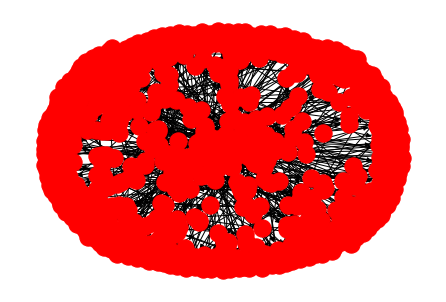

In [24]:
import networkx
import matplotlib.pyplot as plt

networkx.draw(graph)
plt.show()

# Pronto

## Load an ontology from a file

Loading from OWL doesn't work. Use Robot to convert the ontology to OBO and then load from OBO. 


In [6]:
import pronto

# addicto = pronto.Ontology('addicto.owl')

addicto = pronto.Ontology('addicto.obo')

In [7]:
[t for t in itertools.islice(addicto.terms(),10)]

[Term('ADDICTO:0000101', name='7-day point prevalence tobacco smoking abstinence'),
 Term('ADDICTO:0000104', name='abstinence'),
 Term('ADDICTO:0000105', name='abstinence rate'),
 Term('ADDICTO:0000109', name='addictiveness of a behaviour'),
 Term('ADDICTO:0000110', name='adolescent alcohol consumption'),
 Term('ADDICTO:0000111', name='adolescent substance use'),
 Term('ADDICTO:0000114', name='alcohol and substance use'),
 Term('ADDICTO:0000115', name='alcohol consumption change'),
 Term('ADDICTO:0000116', name='alcohol consumption reduction'),
 Term('ADDICTO:0000117', name='alcohol consumption trend')]

## Search for entries

### Label search

There is no "search" function as such in Pronto as far as I can tell. 



In [8]:
[t for t in addicto.terms() if 'smoker' in t.name][1:10]

[Term('ADDICTO:0000370', name='daily tobacco smoker'),
 Term('ADDICTO:0000386', name='non-daily tobacco smoker'),
 Term('ADDICTO:0000392', name='positive self-appraisal of tobacco smoker identity'),
 Term('ADDICTO:0000394', name='predominant smoker'),
 Term('ADDICTO:0000405', name='tobacco smoker'),
 Term('ADDICTO:0000406', name='tobacco smoker identity'),
 Term('ADDICTO:0000713', name='ex-smoker'),
 Term('ADDICTO:0000714', name='ex-smoker identity'),
 Term('ADDICTO:0000717', name='non-smoker identity')]

### Annotation metadata search


In [28]:
smokers = [t for t in addicto.terms() if 'smoker' in t.name]

print("Synonyms:",[s for smoker in smokers for s in smoker.synonyms])

print("Annotations:",[s for smoker in smokers for s in smoker.annotations])

print("IAO:alternative terms",[s.literal for smoker in smokers for s in smoker.annotations if s.property=='IAO:0000118'])


Synonyms: []
Annotations: [LiteralPropertyValue('IAO:0000118', 'Daily smoker'), LiteralPropertyValue('IAO:0000118', 'Daily smoker'), LiteralPropertyValue('IAO:0000118', ' smoker'), LiteralPropertyValue('IAO:0000118', ' daily cigarette smoker'), LiteralPropertyValue('IAO:0000118', 'Occasional smoker'), LiteralPropertyValue('IAO:0000118', 'Positive smoker identity'), LiteralPropertyValue('IAO:0000118', 'Dual user'), LiteralPropertyValue('curator_notes', "A class of 'dual-user'"), LiteralPropertyValue('IAO:0000118', 'Cigarette smoker'), LiteralPropertyValue('IAO:0000118', ' Smoker'), LiteralPropertyValue('IAO:0000118', ' daily smoker'), LiteralPropertyValue('IAO:0000119', 'CN'), LiteralPropertyValue('IAO:0000119', 'CN'), LiteralPropertyValue('IAO:0000118', 'Ever smoker'), LiteralPropertyValue('IAO:0000118', ' ex-vaper'), LiteralPropertyValue('IAO:0000118', 'Smoker'), LiteralPropertyValue('IAO:0000118', ' current smoker'), LiteralPropertyValue('IAO:0000118', ' ex e-cigarette user'), Litera

### Hierarchical searches: find all ancestors and descendents

In [30]:
[smoker] = [t for t in addicto.terms() if 'tobacco smoker' == t.name]

print("Superclasses:",[s for s in smoker.superclasses()])

print("Subclasses:",[s for s in smoker.subclasses()])

print("Other relationships:",[r for r in smoker.relationships])

print("Just immediate parents:",[s for s in smoker.superclasses(distance=1)])

print("Leaf subclasses:",[s for s in smoker.subclasses() if s.is_leaf()])

Superclasses: [Term('ADDICTO:0000405', name='tobacco smoker'), Term('ADDICTO:0000849', name='tobacco-containing product user'), Term('MF:0000016', name='human being'), Term('OGMS:0000087', name='extended organism'), Term('BFO:0000040', name='material entity'), Term('BFO:0000004', name='independent continuant'), Term('BFO:0000002', name='continuant'), Term('BFO:0000001', name='entity')]
Subclasses: [Term('ADDICTO:0000405', name='tobacco smoker'), Term('ADDICTO:0000370', name='daily tobacco smoker'), Term('ADDICTO:0000386', name='non-daily tobacco smoker'), Term('ADDICTO:0000772', name='ever tobacco smoker'), Term('ADDICTO:0000773', name='ex e-cigarette user current smoker'), Term('ADDICTO:0000786', name='pregnant smoker'), Term('ADDICTO:0000788', name='recent smoker'), Term('ADDICTO:0000368', name='daily cigarette smoker'), Term('ADDICTO:0000808', name='long-term ex smoker'), Term('ADDICTO:0000770', name='chain smoker'), Term('ADDICTO:0000802', name='daily non-treatment-seeking cigarett

## Modifying the ontology 



In [31]:
smoker.name = 'tobacco smoker X'

print(smoker)

smoker.name = 'tobacco smoker'

print(smoker)

Term('ADDICTO:0000405', name='tobacco smoker X')
Term('ADDICTO:0000405', name='tobacco smoker')


## Saving the ontology 

In [32]:
with open("addicto_modified.obo", "wb") as f:
    addicto.dump(f, format="obo")

In [33]:
with open("addicto_modified.owl", "wb") as f:
    addicto.dump(f, format="owl")

ValueError: could not find a serializer to handle 'owl'

# PyHornedOWL

(very experimental)

In [11]:
import pyhornedowl

onto = pyhornedowl.open_ontology("addicto-merged.owx")

In [12]:
classes = onto.get_classes()
axioms = onto.get_axioms()

import itertools
print([c for c in itertools.islice(classes,10)])

axioms[1:10]

['http://addictovocab.org/ADDICTO_0000873', 'http://addictovocab.org/ADDICTO_0000884', 'http://purl.obolibrary.org/obo/ENVO_00010483', 'http://purl.obolibrary.org/obo/OBCS_0000218', 'http://addictovocab.org/ADDICTO_0000141', 'http://addictovocab.org/ADDICTO_0000805', 'http://addictovocab.org/ADDICTO_0000207', 'http://addictovocab.org/ADDICTO_0000817', 'http://addictovocab.org/ADDICTO_0000455', 'http://addictovocab.org/ADDICTO_0000478']


[['SubClassOf',
  'http://addictovocab.org/ADDICTO_0000101',
  'http://addictovocab.org/ADDICTO_0000697'],
 ['AnnotationAssertion',
  'http://addictovocab.org/ADDICTO_0000101',
  'http://purl.obolibrary.org/obo/IAO_0000115',
  'Point prevalence tobacco smoking abstinence that lasts for 7 days prior to a time point.'],
 ['AnnotationAssertion',
  'http://addictovocab.org/ADDICTO_0000101',
  'http://www.w3.org/2000/01/rdf-schema#label',
  '7-day point prevalence tobacco smoking abstinence'],
 ['DeclareClass', 'http://addictovocab.org/ADDICTO_0000104'],
 ['SubClassOf',
  'http://addictovocab.org/ADDICTO_0000104',
  'http://humanbehaviourchange.org/ontology/BCIO_042000'],
 ['AnnotationAssertion',
  'http://addictovocab.org/ADDICTO_0000104',
  'http://purl.obolibrary.org/obo/IAO_0000115',
  'The behaviour of not performing a behaviour of a particular type.'],
 ['AnnotationAssertion',
  'http://addictovocab.org/ADDICTO_0000104',
  'http://www.w3.org/2000/01/rdf-schema#comment',
  'Abstinence 

## Ancestors and Descendents

In [13]:
clssid = onto.get_iri_for_label("tobacco smoker")
RDFSLABEL = "http://www.w3.org/2000/01/rdf-schema#label"

ancestors = pyhornedowl.get_ancestors(onto,clssid)
print(f"Got ancestors {ancestors} for class {clssid}")

print("Getting labels for IRIs")
descs = pyhornedowl.get_descendants(onto,onto.get_iri_for_label('identity'))
desc_names = [onto.get_annotation(d,RDFSLABEL) for d in descs]
print(len(desc_names))


Got ancestors {'http://purl.obolibrary.org/obo/BFO_0000002', 'http://purl.obolibrary.org/obo/OGMS_0000087', 'http://addictovocab.org/ADDICTO_0000405', 'http://addictovocab.org/ADDICTO_0000849', 'http://purl.obolibrary.org/obo/BFO_0000004', 'http://purl.obolibrary.org/obo/BFO_0000001', 'http://www.w3.org/2002/07/owl#Thing', 'http://purl.obolibrary.org/obo/BFO_0000040', 'http://purl.obolibrary.org/obo/MF_0000016'} for class http://addictovocab.org/ADDICTO_0000405
Getting labels for IRIs
5


## Update Ontology

In [14]:
print(f"Ontology has {len(onto.get_axioms())} axioms.")

onto.add_axiom(['SubClassOf',clssid,'http://testing.testing'])

onto.add_axiom(['AnnotationAssertion', clssid, 'http://test_annotation', 'Testing Added Annotation Value'])

onto.add_axiom(['SubClassOf', clssid, ['ObjectSomeValuesFrom', 'http://test-op', 'http://test-ob-target']])

print (f"Ontology now has {len(onto.get_axioms())} axioms.")

print (f"Axioms for class {clssid} are: {onto.get_axioms_for_iri(clssid)}")
       

Ontology has 7156 axioms.
Ontology now has 7159 axioms.
Axioms for class http://addictovocab.org/ADDICTO_0000405 are: [['DeclareClass', 'http://addictovocab.org/ADDICTO_0000405'], ['SubClassOf', 'http://addictovocab.org/ADDICTO_0000405', 'http://addictovocab.org/ADDICTO_0000849'], ['SubClassOf', 'http://addictovocab.org/ADDICTO_0000405', 'http://testing.testing'], ['SubClassOf', 'http://addictovocab.org/ADDICTO_0000405', ['ObjectSomeValuesFrom', 'http://test-op', 'http://test-ob-target']], ['AnnotationAssertion', 'http://addictovocab.org/ADDICTO_0000405', 'http://purl.obolibrary.org/obo/IAO_0000115', 'A psychoactive substance user who participates in tobacco smoking.'], ['AnnotationAssertion', 'http://addictovocab.org/ADDICTO_0000405', 'http://purl.obolibrary.org/obo/IAO_0000118', ' Smoker'], ['AnnotationAssertion', 'http://addictovocab.org/ADDICTO_0000405', 'http://purl.obolibrary.org/obo/IAO_0000118', ' daily smoker'], ['AnnotationAssertion', 'http://addictovocab.org/ADDICTO_0000405'

# Performance Comparison 

We can check the performance of the different libraries when loading a typically large bio-ontology such as ChEBI. 

## OWLReady2


In [36]:
%%time

onto = get_ontology("chebi_core.owx").load()

CPU times: user 51.7 s, sys: 1.52 s, total: 53.3 s
Wall time: 1min


## Pronto

In [37]:
%%time

onto2 = pronto.Ontology('chebi_core.obo')



CPU times: user 41.2 s, sys: 1.54 s, total: 42.7 s
Wall time: 31.7 s


## OntoBio

In [38]:
%%time

ont = ofactory.create("chebi_core.obo")

CPU times: user 5min 32s, sys: 4.2 s, total: 5min 36s
Wall time: 7min


## PyHornedOWL

In [1]:
%%time

ont = pyhornedowl.open_ontology("chebi_core.owx")

CPU times: user 32.3 s, sys: 1.84 s, total: 34.1 s
Wall time: 38.7 s


# Summary


1. OWLReady2 is the only library that really uses OWL and gives access to OWL reasoning. But it has a rather radical "ontology programming" approach, and  does not work well with metadata. 
2. OntoBio and Pronto both work from OBO format and work from a graph ontology model. They say they support OWL, but I couldn't get them to work for an OWL file in practice.
3. OntoBio is slow and clunky with a weird metadata accessor approach, and it is a bit delicate. But, it has some cool features. 
4. Pronto is fast and relatively stable. 
5. PyHornedOWL is as fast as Pronto and gives (lightweight) access to OWL axioms. (Although the implementation is far from complete)
